1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

Z: 3.4661629670697414


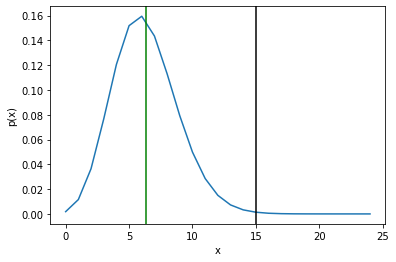

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import fftpack
import pandas as pd
import math

x0 = 15
mu = 6.3

# Z score
Z = abs(x0 - mu) / math.sqrt(mu)
print("Z:", Z)

# Poisson
k = np.arange(25)
y = stats.poisson.pmf(k, mu)
plt.plot(k, y)
plt.axvline(x0,  color='black')
plt.axvline(mu, color='green')
plt.ylabel("p(x)")
plt.xlabel("x")
plt.show()

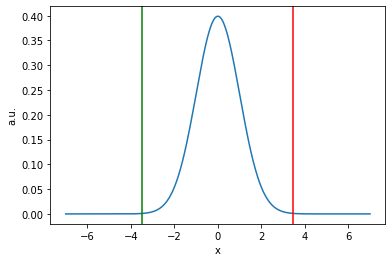

p:  0.0005279431738299246


In [23]:
xs = np.linspace(-7, +7, 1000)
ts = stats.norm.pdf(xs)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(Z))
plt.axvline( Z, color='red')
plt.axvline(-Z, color='green')
plt.ylabel("a.u.")
plt.xlabel("x")
plt.show()

p = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))

print("p: ", p)

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [5]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

n = len(post)
sigma_1 = np.sqrt(np.var(pre, ddof=1))
sigma_2 = np.sqrt(np.var(post, ddof=1))
sigma = math.sqrt((sigma_1**2 + sigma_2**2)/2)

x_pre = np.mean(pre)
x_post = np.mean(post)
T = (x_pre - x_post)/(sigma*math.sqrt(2/n))

print("T: ",T)

# calculate the p
p = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p: ",p)

T:  -3.786997938137629
p:  0.004302464132864604


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

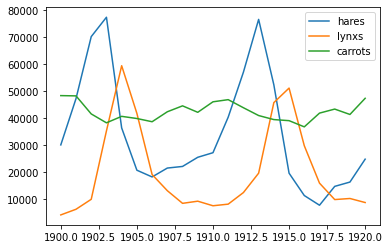

In [8]:
data = np.loadtxt("populations.txt")

df = pd.DataFrame(data)
years = df[0].values
hares = df[1].values
lynxs = df[2].values
carrots = df[3].values
plt.plot(years, hares, label='hares')
plt.plot(years, lynxs, label='lynxs')
plt.plot(years, carrots, label='carrots')
plt.legend()

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

\begin{align}f_1(t) = \int dt'\, K(t-t') f_0(t')\end{align}

\begin{align}\tilde{f}_1(\omega) = \tilde{K}(\omega) \tilde{f}_0(\omega)\end{align}

Text(0.5, 1.0, 'Original image')

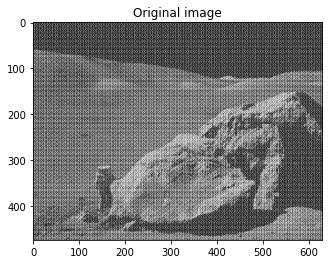

In [9]:
#read and plot image
import numpy as np
import matplotlib.pyplot as plt

im = plt.imread('moonlanding.png').astype(float)

plt.figure()
plt.imshow(im, plt.cm.gray)
plt.title('Original image')

Text(0.5, 1.0, 'Fourier transform')

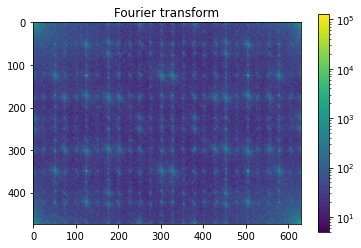

In [10]:
#Compute the 2d FFT of the input image

from scipy import fftpack
im_fft = fftpack.fft2(im)

# Show the results

def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

plt.figure()
plot_spectrum(im_fft)
plt.title('Fourier transform')

Text(0.5, 1.0, 'Filtered Spectrum')

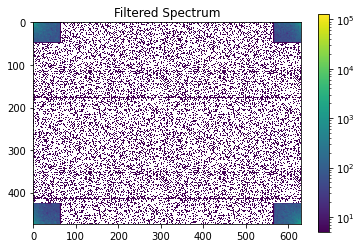

In [11]:
#FILTER IN FFT

# In the lines following, we'll make a copy of the original spectrum and
# truncate coefficients.

# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.1

# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
im_fft2 = im_fft.copy()

# Set r and c to be the number of rows and columns of the array.
r, c = im_fft2.shape

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

# Similarly with the columns:
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.figure()
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')

Text(0.5, 1.0, 'Reconstructed Image')

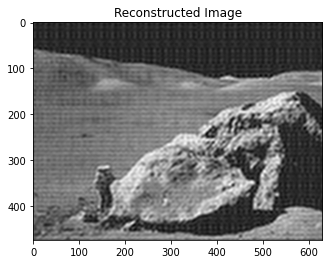

In [12]:
#Reconstruct the final image

im_new = fftpack.ifft2(im_fft2).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')

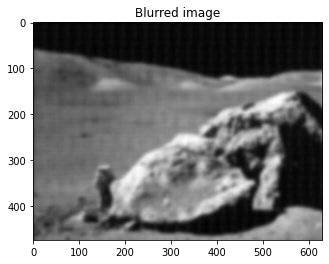

In [13]:
#Easier and better: :func:scipy.ndimage.gaussian_filter

#We can use the Gaussian filter from :mod:scipy.ndimage

from scipy import ndimage
im_blur = ndimage.gaussian_filter(im, 4)

plt.figure()
plt.imshow(im_blur, plt.cm.gray)
plt.title('Blurred image')

plt.show()